# Linear Regression

In [361]:
%matplotlib inline 

from sklearn import linear_model # training linear model
from mpl_toolkits.mplot3d import Axes3D # 3D plotting

import numpy.random # generate noisy data
import matplotlib.pyplot # general plotting
import pandas as pd
import math

def linear_regression(x_data, y_data):
    model = linear_model.LinearRegression()
    model.fit(X=x_data, y=y_data)
    return model
def print_linear_regression_fit(model):
    if (len(model.coef_) == 1):
        print('Intercept: {i} Coefficient: {c}'.format(i=model.intercept_[0], c=model.coef_[0][0]))
    else:
        print('Intercept: {i} Coefficients: {c}'.format(i=model.intercept_, c=model.coef_))
def generate_linear_data(MIN, MAX, NUM_INPUTS, COEFFICIENT, INTERCEPT):
    ran_x = numpy.random.uniform(low=MIN, high=MAX, size=(NUM_INPUTS, 1))
    data_frame = pd.DataFrame(data=ran_x, columns=['x'])
    data_frame['y'] = COEFFICIENT*data_frame['x']+INTERCEPT
    
    avg = 0
    temp_y = data_frame['y'].values.reshape(-1, 1)
    for y in temp_y:
        avg += y[0]
    avg = avg/len(temp_y)
    SD = 0
    for y in temp_y:
        SD += abs(y[0]-avg)
    SD = SD/len(temp_y)
    #SD = math.sqrt(SD)
    noise_y = numpy.random.normal(loc=0, scale=SD, size=NUM_INPUTS)
    
    data_frame['y'] = data_frame['y'] + noise_y
    data_frame.plot.scatter(x='x', y='y')
    reshaped_x = data_frame['x'].values.reshape(-1, 1)
    reshaped_y = data_frame['y'].values.reshape(-1, 1)
    output = (reshaped_x, reshaped_y)
    return output
def graph_linear_regression(model, data_x, data_y):
    MIN_X = data_x[0][0]
    MAX_X = data_x[0][0]
    for num in data_x:
        if num[0] < MIN_X:
            MIN_X = num[0]
        elif num[0] > MAX_X:
            MAX_X = num[0]
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('Data vs Regression')
    matplotlib.pyplot.xlabel('x values')
    matplotlib.pyplot.ylabel('y values')
    matplotlib.pyplot.scatter(data_x, data_y)    
    all_X = numpy.linspace(MIN_X, MAX_X)
    all_Y = model.predict(list(zip(all_X)))
    matplotlib.pyplot.plot(all_X, all_Y)
    

## Example

Intercept: 16.412532287201998 Coefficient: 15.555247427326815


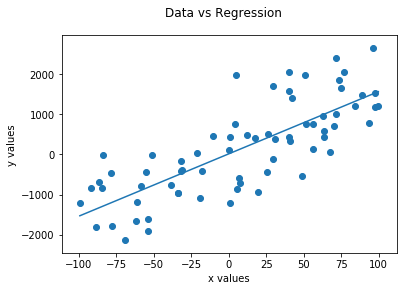

In [362]:
example_data = generate_linear_data(-100, 100, 69, 15, 15)
example_model = linear_regression(example_data[0], example_data[1])
print_linear_regression_fit(example_model)
graph_linear_regression(example_model, example_data[0], example_data[1])

# 3D Linear Regression

In [363]:
def generate_linear_data_3d(MIN, MAX, NUM_INPUTS, COEFFICIENT_1, COEFFICIENT_2, INTERCEPT):
    x_3d = numpy.random.uniform(low=MIN, high=MAX, size=NUM_INPUTS)
    y_3d = numpy.random.uniform(low=MIN, high=MAX, size=NUM_INPUTS)
    
    x_tuple = (list(zip(*list(zip(x_3d)))))[0]
    y_tuple = (list(zip(*list(zip(y_3d)))))[0]
    avg_x = 0
    avg_y = 0
    for x in x_tuple:
        avg_x += x
    for y in y_tuple:
        avg_y += y
    avg_x = avg_x/len(x_tuple)
    avg_y = avg_y/len(y_tuple)
    SD_x = 0
    SD_y = 0
    for x in x_tuple:
        SD_x += abs(x-avg_x)
    for y in y_tuple:
        SD_y += abs(y-avg_y)
    SD_x = SD_x/len(x_tuple)
    SD_y = SD_y/len(y_tuple)
    SD = (SD_x+SD_y)/2
    
    noise_3d = numpy.random.normal(loc=0, scale=SD, size=NUM_INPUTS)
    z_3d = COEFFICIENT_1*x_3d + COEFFICIENT_2*y_3d + INTERCEPT + noise_3d
    data_3d = pd.DataFrame(data=x_3d, columns=['x'])
    data_3d['y'] = y_3d
    data_3d['z'] = z_3d
    return data_3d
def linear_regression_3d(data_3d):
    model = linear_model.LinearRegression()
    model.fit(data_3d[['x', 'y']], data_3d['z'])
    return model
def graph_linear_regression_3d(model, x, y, z):
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('3D Data vs Best Fit Plane')
    
    axes = fig.gca(projection='3d')
    axes.set_xlabel('x')
    axes.set_ylabel('y')
    axes.set_zlabel('z')
    
    axes.scatter(x, y, z)
    
    x_arr = list(zip(*list(zip(x))))
    y_arr = list(zip(*list(zip(y))))
    MIN = x_arr[0][0]
    MAX = x_arr[0][0]
    for i in x_arr[0]:
        if i < MIN:
            MIN = i
        if i > MAX:
            MAX = i
    for a in y_arr[0]:
        if i < MIN:
            MIN = i
        if i > MAX:
            MAX = i
            
    X = Y = numpy.arange(MIN, MAX, 0.05)
    X, Y = numpy.meshgrid(X, Y)
    Z = numpy.array(model.predict(list(zip(X.flatten(), Y.flatten())))).reshape(X.shape)
    
    axes.plot_surface(X, Y, Z, alpha=0.1)
    matplotlib.pyplot.show()

## Example

Intercept: 5.6051007257532035 Coefficients: [2.93327483 0.93271775]


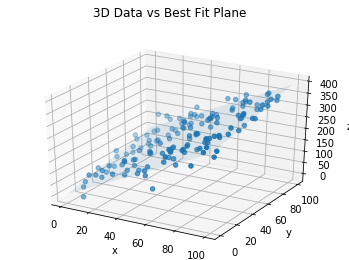

In [364]:
example_data_3d = generate_linear_data_3d(0, 100, 150, 3, .9, 5)
example_model_3d = linear_regression_3d(example_data_3d)
print_linear_regression_fit(example_model_3d)
graph_linear_regression_3d(example_model_3d, example_data_3d['x'], example_data_3d['y'], example_data_3d['z'])

# Decision Trees and Random Forest

In [365]:
%matplotlib inline
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from six import StringIO
import pydot
import os.path
import pandas as pd
import matplotlib.pyplot

In [366]:
def decision_tree(data, target):
    model = tree.DecisionTreeClassifier()
    model.fit(data, target)
    return model
def tree_visualization(model, features, targets, file_location, file_name):
    dot_data = StringIO()
    tree.export_graphviz(model, out_file=dot_data, feature_names=features, class_names=targets,
                     filled=True, rounded=True, special_characters=True)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
    path = "~/" + file_location + file_name + ".pdf"
    graph.write_pdf(os.path.expanduser(path))
def random_forest(data, target):
    model = RandomForestClassifier(n_estimators=10)
    model = model.fit(data, target)
    return model

## Example

In [367]:
from sklearn.datasets import load_iris
example_data = load_iris()
tree_visualization(decision_tree(example_data.data, example_data.target), example_data.feature_names, example_data.target_names, "example_path/", "example_name")
example_random_forest = random_forest(example_data.data, example_data.target)

# Logistic Regression

In [398]:
from sklearn import linear_model 
from sklearn.datasets import load_iris 

import random
import numpy
numpy.set_printoptions(suppress=True)

%matplotlib inline
import matplotlib.pyplot

class Data:
    def __init__(self, data, classes, expected):
        self.data = data
        self.classes = classes
        self.expected = expected
    
def logit_regression(features, classes):
    logit_model = linear_model.LogisticRegression()
    logit_model.fit(features, classes)
    return logit_model
def print_logistic_regression_fit(model):
    print('Intercepts: {0}  Coefficients: {1}'.format(model.intercept_, model.coef_))
def generate_classifying_data(NUM_INPUTS, NUM_CLASSES, NUM_FEATURES, MIN, MAX, STANDARD_DEVIATION=.125):
    attributes = [] # average values for each feature class combination
    unorganized = [] # raw data not properly organized
    for feature in range(0, NUM_FEATURES): # I iterate through features instead of classes so that for each feature each class has a different average
        values = random.sample(range(MIN, MAX), NUM_CLASSES)
        attributes.append(values)
    attributes = list(zip(*attributes)) # each tuple is a class
    class_index = 0  
    for cls in range(0, NUM_CLASSES):
        feature_index = 0
        for feature in range(0, NUM_FEATURES):
            values = numpy.random.normal(loc=attributes[class_index][feature_index], size=NUM_INPUTS, scale=(abs(MIN-MAX)*STANDARD_DEVIATION))
            unorganized.append(values)
            feature_index += 1
        class_index += 1
    output_classes = []
    for cls in range(0, NUM_CLASSES):
        output_classes += [cls]*NUM_INPUTS
    output_data = []
    for cls in range(0, NUM_CLASSES):
        for datapoint in range(0, NUM_INPUTS):
            data = []
            for arr in unorganized[(cls*NUM_FEATURES):((cls+1)*NUM_FEATURES)]:
                data.append(arr[datapoint])
            output_data.append(tuple(data))
    output = Data(output_data, output_classes, attributes)
    return output
def logit_data_visualization(data, feature_1, feature_2, class_1, class_2):
    fig = matplotlib.pyplot.figure()
    fig.suptitle('Logit Data Set')
    matplotlib.pyplot.xlabel('Feature #{}'.format(feature_1))
    matplotlib.pyplot.ylabel('Feature #{}'.format(feature_2))
    num_classes = len(data.expected)
    num_datapoints = len(data.data)/num_classes
    data_locations = [int((class_1-1)*num_datapoints), int(class_1*num_datapoints), int((class_2-1)*num_datapoints), int(class_2*num_datapoints)]
    a_scatter = matplotlib.pyplot.scatter(list(zip(*data.data[data_locations[0]:data_locations[1]]))[feature_1], list(zip(*data.data[data_locations[0]:data_locations[1]]))[feature_2], c="red", marker="o", label='Class #{}'.format(class_1))
    b_scatter = matplotlib.pyplot.scatter(list(zip(*data.data[data_locations[2]:data_locations[3]]))[feature_1], list(zip(*data.data[data_locations[2]:data_locations[3]]))[feature_2], c="blue", marker="*", label='Class #{}'.format(class_2))
    matplotlib.pyplot.legend(handles=[a_scatter, b_scatter])
    matplotlib.pyplot.show()
def test_logistic_regression_model(model, data):
    num_classes = len(data.expected)
    num_features = len(data.expected[0])
    class_1_datapoint = []
    class_2_datapoint = []
    for feature in range(0, num_features):
        class_1_datapoint.append(numpy.random.normal(loc=data.expected[0][feature]))
        class_2_datapoint.append(numpy.random.normal(loc=data.expected[num_classes-1][feature]))
        inputs = [class_1_datapoint, class_2_datapoint]
    predictions = model.predict(inputs)
    print('Class predictions: {0}'.format(model.predict(inputs))) # guess which class
    print('Probabilities:\n{0}'.format(model.predict_proba(inputs))) # give probability of each class
    probabilities = model.predict_proba(inputs)
    if (predictions[0] == 0 and predictions[1] == (num_classes-1)):
        print("Test Successfull!")
        return True
    else:
        return False
        
        

## Example

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


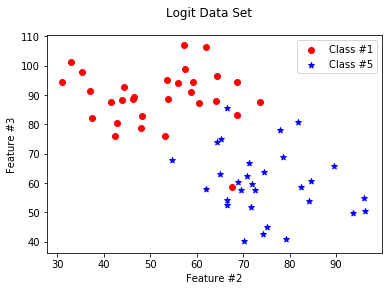

Intercepts: [-0.01489723  0.77533611 -0.26836695 -0.00496464 -1.72013175]  Coefficients: [[-0.25978653  0.32047625 -0.12642988  0.15685698 -0.5356899 ]
 [-0.14034746 -0.08226516  0.10325898 -0.13024488  0.05134049]
 [-0.39607907 -0.29233553 -0.54789959  0.23640685  0.30268993]
 [ 0.22932605  0.18312426 -0.18159437 -0.33709582  0.05826594]
 [ 0.0774189  -0.08030691  0.03625258  0.01743338 -0.10654914]]
Class predictions: [0 4]
Probabilities:
[[0.96847938 0.00001808 0.         0.         0.03150254]
 [0.00000001 0.00047931 0.         0.00000013 0.99952055]]
Test Successfull!


True

In [399]:
example_logit_data = generate_classifying_data(30, 5, 5, 0, 100)
example_logit_model = logit_regression(example_logit_data.data, example_logit_data.classes)
logit_data_visualization(example_logit_data, 2, 3, 1, 5)
print_logistic_regression_fit(example_logit_model)
test_logistic_regression_model(example_logit_model, example_logit_data)

# Naive Bayes

In [400]:
from sklearn.datasets import fetch_20newsgroups # data
from sklearn.naive_bayes import MultinomialNB # model

from sklearn.feature_extraction.text import CountVectorizer # data processing
from sklearn.feature_extraction.text import TfidfTransformer # data processing

def naive_bayes(frequency, target):
    return MultinomialNB().fit(frequency, target)
def naive_data_prep(data):
    word_vector = CountVectorizer()
    word_vector_counts = word_vector.fit_transform(data.data)
    term_freq_transformer = TfidfTransformer()
    term_freq = term_freq_transformer.fit_transform(word_vector_counts)
    return term_freq
def naive_bayes_test(fake_data, expected, model, real_data):
    word_vector = CountVectorizer()
    word_vector_counts = word_vector.fit_transform(real_data.data)
    term_freq_transformer = TfidfTransformer()
    term_freq_transformer.fit_transform(word_vector_counts)
    counts = word_vector.transform(fake_data)
    term_freq = term_freq_transformer.transform(counts)
    predictions = model.predict(term_freq)
    indexer = 0
    output = True
    print('Predictions:')
    for doc, group in zip(fake_data, predictions):
        print('\t{0} => {1}'.format(doc, real_data.target_names[group]))
        if (real_data.target_names[group] != expected[indexer]):
            output = False
        indexer += 1
    probabilities = model.predict_proba(term_freq)
    print('Probabilities:')
    print(''.join(['{:17}'.format(name) for name in real_data.target_names]))
    for probs in probabilities:
        print(''.join(['{:<17.8}'.format(prob) for prob in probs]))
    if not output:
        print('Model failed ;(')
    return output


## Example

In [401]:
to_download = ['comp.graphics', 'rec.sport.hockey', 'sci.electronics', 'sci.space']
example_naive_data = fetch_20newsgroups(categories=to_download, shuffle=True, random_state=265)
example_naive_frequency = naive_data_prep(example_naive_data)
example_naive_model = naive_bayes(example_naive_frequency, example_naive_data.target)
fake_example = [
    'My 1660 TI is a great GPU with lots of VRAM',
    'The player had a wicked slap shot during the game',
    'I spent all day yesterday soldering banks of capacitors at robotics',
    'NASA has several rovers on Mars']
fake_expected = [
    'comp.graphics',
    'rec.sport.hockey',
    'sci.electronics',
    'sci.space']
naive_bayes_test(fake_example, fake_expected, example_naive_model, example_naive_data)

Predictions:
	My 1660 TI is a great GPU with lots of VRAM => sci.space
	The player had a wicked slap shot during the game => rec.sport.hockey
	I spent all day yesterday soldering banks of capacitors at robotics => sci.space
	NASA has several rovers on Mars => sci.space
Probabilities:
comp.graphics    rec.sport.hockey sci.electronics  sci.space        
0.17354896       0.19155755       0.21956498       0.41532851       
0.071744077      0.68321543       0.11405667       0.13098382       
0.19606297       0.22612681       0.2649335        0.31287672       
0.091902227      0.062842265      0.11893481       0.7263207        
Model failed ;(


False

# SVM Classifiers

In [402]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
default_titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, model, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
def svm_classifiers(data, target):
    C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='poly', degree=3, C=C))
    models = (model.fit(data, target) for model in models)
    return models
def graph_svm(models, data, target, x_label='x', y_label='y', titles=default_titles):
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    X0, X1 = data[:, 0], data[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    for model, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=target, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
    plt.show()

## Example 1

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


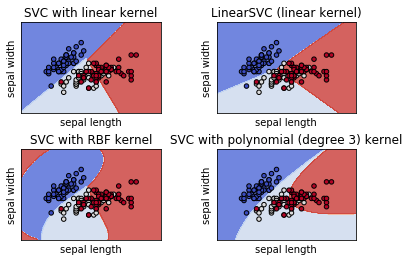

In [403]:
example_svm_dataset = datasets.load_iris()
example_data = example_svm_dataset.data[:, :2]
example_target = example_svm_dataset.target
example_classifiers = svm_classifiers(example_data, example_target)
graph_svm(example_classifiers, example_data, example_target, 'sepal length', 'sepal width')


## Example 2

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


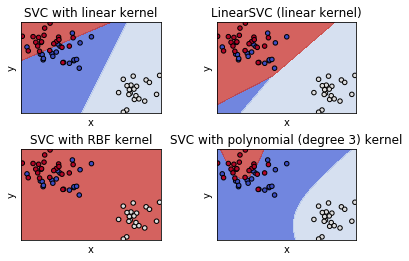

In [404]:
example_svm_dataset = generate_classifying_data(NUM_INPUTS=20, NUM_CLASSES=3, NUM_FEATURES=2, MIN=0, MAX=100) # generate dataset
example_data = np.asarray(example_svm_dataset.data) # convert from array of tuples to array of arrays
example_target = example_svm_dataset.classes 
example_classifiers = svm_classifiers(example_data, example_target) # create and fit models
graph_svm(example_classifiers, example_data, example_target) # graph models vs data